In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
from math import gamma
from operator import mul
from functools import reduce
sns.set(style='white', font_scale=1.2, font='consolas')

def plot_mesh(corners):
    """Subdivide the triangle into a triangular mesh and plot the original and subdivided triangles."""
    triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=4)
    
    plt.figure(figsize=(6, 4))
    for i, mesh in enumerate((triangle, trimesh)):
        plt.subplot(1, 2, i+1)
        plt.triplot(mesh)
        plt.axis('off')
        plt.axis('equal')    
        
        
class Dirichlet:
    """Define the Dirichlet distribution with vector parameter alpha."""
    def __init__(self, alpha):
        
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    
    def pdf(self, x):
        """Returns pdf value for `x`. """
        return self._coef * reduce(mul, [xx ** (aa-1) for (xx, aa) in zip(x, self._alpha)])
        
        
class PlotDirichlet:
    """
    Plot the Dirichlet distribution as a contour plot on a 2-Simplex.
    """
    def __init__(self, corners):
        self._corners = corners
        self._triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
        # Midpoints of triangle sides opposite of each corner
        self._midpoints = [(corners[(i+1) % 3] + corners[(i+2) % 3]) / 2.0 for i in range(3)]
        
    def xy2bc(self, xy, tol=1.e-3):
        """Map the x-y coordinates of the mesh vertices to the simplex coordinate space (aka barycentric coordinates).
        Here we use a simple method that uses vector algebra. For some values of alpha, calculation of the Dirichlet pdf 
        can become numerically unstable at the boundaries of the simplex so our conversion function will take an optional 
        tolerance that will avoid barycentric coordinate values directly on the simplex boundary.        
        """
        s = [(self._corners[i] - self._midpoints[i]).dot(xy - self._midpoints[i]) / 0.75 for i in range(3)]
        return np.clip(s, tol, 1.0-tol)
        
    def draw_pdf_contours(self, ax, dist, label=None, nlevels=200, subdiv=8, **kwargs):
        """Draw pdf contours for a Dirichlet distribution"""
        # Subdivide the triangle into a triangular mesh
        refiner = tri.UniformTriRefiner(self._triangle)
        trimesh = refiner.refine_triangulation(subdiv=subdiv)
        
        # convert to barycentric coordinates and compute probabilities of the given distribution 
        pvals = [dist.pdf(self.xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    
        ax.tricontourf(trimesh, pvals, nlevels, **kwargs)
        #plt.axis('equal')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 0.75**0.5)
        ax.set_title(str(label))
        ax.axis('off') 
        return ax


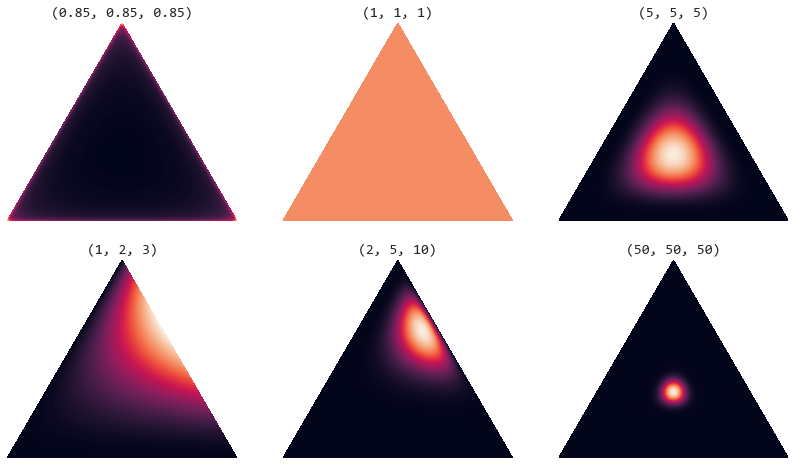

In [30]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
plot_dirichlet = PlotDirichlet(corners)
f, axes = plt.subplots(2, 3, figsize=(14, 8))
ax = axes[0, 0]
alpha = (0.85, 0.85, 0.85)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)

ax = axes[0, 1]
alpha = (1, 1, 1)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)

ax = axes[0, 2]
alpha = (5, 5, 5)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)

ax = axes[1, 0]
alpha = (1, 2, 3)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)

ax = axes[1, 1]
alpha = (2, 5, 10)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)

ax = axes[1, 2]
alpha = (50, 50, 50)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)

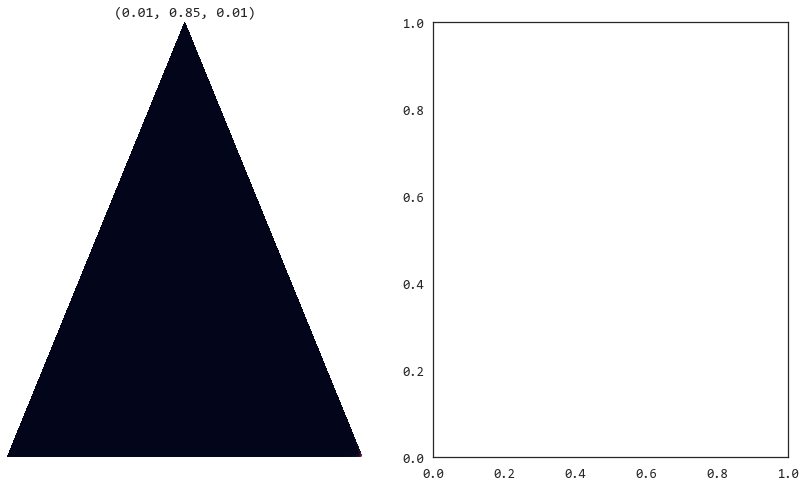

In [37]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
plot_dirichlet = PlotDirichlet(corners)
f, axes = plt.subplots(1, 2, figsize=(14, 8))
ax = axes[0]
alpha = (0.01, 0.85,0.01)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)


In [20]:
import tensorflow as tf
class Dirichlet:
    """Define the Dirichlet distribution with vector parameter alpha."""
    def __init__(self, alpha):
        
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    
    def pdf(self, x):
        """Returns pdf value for `x`. """
        return self._coef * reduce(mul, [xx ** (aa-1) for (xx, aa) in zip(x, self._alpha)])
        # p = tf.reduce_sum(x)
        # return p
        
        

In [23]:
alpha = (0.85, 0.85, 0.85)
dist = Dirichlet(alpha)
print(dist.pdf([0.85, 0.6, 0.85]))

1.1343308972596948


In [13]:
reduce(mul, [gamma(a) for a in alpha])

1.3768321948055933

In [15]:
gamma(0.85) * gamma(0.85) * gamma(0.85)

1.3768321948055933

In [28]:
import tensorflow as tf
array  = np.array([-8.9234295,	-6.1875224,	-8.255227,	-8.922784,	-8.412579,	-8.529477,	-1.03E+01,	-7.42E+00,	-7.05E+00,	-4.79E+00])
tf.nn.softmax(array)

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.01039757, 0.16036935, 0.02028284, 0.01040429, 0.01732972,
       0.01541784, 0.00262479, 0.04675878, 0.0676943 , 0.64872052])>

In [29]:
array  = np.array([-8.9234295,	-6.1875224,	-8.255227,	-8.922784,	-8.412579,	-8.529477,	-1.03E+01,	-7.42E+00,	-7.05E+00,	-4.79E+00])
print(tf.nn.softplus(array))
print(tf.nn.softmax(array))

tf.Tensor(
[1.33221672e-04 2.05280326e-03 2.59862754e-04 1.33307688e-04
 2.22031783e-04 1.97538754e-04 3.36325296e-05 5.98969727e-04
 8.67032976e-04 8.27809918e-03], shape=(10,), dtype=float64)
tf.Tensor(
[0.01039757 0.16036935 0.02028284 0.01040429 0.01732972 0.01541784
 0.00262479 0.04675878 0.0676943  0.64872052], shape=(10,), dtype=float64)


In [30]:
array  = np.array([-8.9234295,	-6.1875224,	-8.255227,	-8.922784,	-8.412579,	-8.529477,	-1.03E+01,	-7.42E+00,	-7.05E+00,	-4.79E+00])
#shift by the mean
mean = np.mean(array)
_array = array + abs(mean)
print(mean, array + abs(mean))
print(tf.nn.softplus(_array))
print(tf.nn.softmax(_array))

-7.879101890000001 [-1.04432761  1.69157949 -0.37612511 -1.04368211 -0.53347711 -0.65037511
 -2.42089811  0.45910189  0.82910189  3.08910189]
tf.Tensor(
[0.301532   1.86067083 0.52266512 0.30170007 0.46156934 0.41992669
 0.08511456 0.94881676 1.19127047 3.1336381 ], shape=(10,), dtype=float64)
tf.Tensor(
[0.01039757 0.16036935 0.02028284 0.01040429 0.01732972 0.01541784
 0.00262479 0.04675878 0.0676943  0.64872052], shape=(10,), dtype=float64)


In [31]:
array  = np.array([-8.9234295,	-6.1875224,	-8.255227,	-8.922784,	-8.412579,	-8.529477,	-1.03E+01,	-7.42E+00,	-7.05E+00,	-4.79E+00])
evid = tf.nn.softplus(array)
print('evid', evid)
alpha = evid + 1
print('alpha', alpha)
sum = tf.reduce_sum(alpha).numpy()
print("sum", sum)
uncert = len(array) / sum
print("uncert", uncert)
belief = evid / sum
print("belief", belief)

evid tf.Tensor(
[1.33221672e-04 2.05280326e-03 2.59862754e-04 1.33307688e-04
 2.22031783e-04 1.97538754e-04 3.36325296e-05 5.98969727e-04
 8.67032976e-04 8.27809918e-03], shape=(10,), dtype=float64)
alpha tf.Tensor(
[1.00013322 1.0020528  1.00025986 1.00013331 1.00022203 1.00019754
 1.00003363 1.00059897 1.00086703 1.0082781 ], shape=(10,), dtype=float64)
sum 10.012776500319411
uncert 0.9987239802747017
belief tf.Tensor(
[1.33051678e-05 2.05018384e-04 2.59531164e-05 1.33137585e-05
 2.21748466e-05 1.97286690e-05 3.35896138e-06 5.98205430e-05
 8.65926624e-05 8.26753616e-04], shape=(10,), dtype=float64)


In [87]:
array  = np.array([-8.9234295,  -6.1875224,  -8.255227 ,  -8.922784  ,-8.412579  , -8.529477,   -10.29205 ,   -7.41577   , -7.050971  , -4.7885065])
array  = np.array([-9.600824 ,  -7.072179 , -14.648336  , -9.590681 , -11.01171  , -11.080234 ,  -8.732408 , -12.02829  , -11.127928  , -6.8077936])
array = np.array([-7.8851542, -5.159377 , -5.395198,  -6.0371304, -6.1552296, -6.594585, -4.4478493, -6.218572,  -5.570344 , -3.9713662])
array = np.array([-11.497593  , -6.7741165 , -7.582055  , -7.637156,  -12.394979 ,  -8.178977,   -4.7520847,  -8.678291,   -8.982205  , -5.151577])
array = np.array([-235.74612,  -85.43761, -118.49854, -160.97406 ,-119.01024, -197.01889,   -69.33267, -177.07362, -193.111 ,   -33.01674])
mean = np.mean(array)
print("mean",mean)
array = array + abs(mean)
evid = tf.nn.softplus(array)
print('evid', evid)
alpha = evid + 1
print('alpha', alpha)
sum = tf.reduce_sum(alpha).numpy()
print("sum", sum)
uncert = len(array) / sum
print("uncert", uncert)
belief = evid / sum
print("belief", belief)
print(tf.reduce_mean(belief))
# print(tf.reduce_sum(belief)+uncert)
# _belief = belief - np.amax(belief)

mean -138.92194899999998
evid tf.Tensor(
[8.90834073e-43 5.34843390e+01 2.04234090e+01 2.64782866e-10
 1.99117090e+01 5.87244703e-26 6.95892790e+01 2.69736557e-17
 2.92411313e-24 1.05905209e+02], shape=(10,), dtype=float64)
alpha tf.Tensor(
[  1.        54.484339  21.423409   1.        20.911709   1.
  70.589279   1.         1.       106.905209], shape=(10,), dtype=float64)
sum 279.3139450038658
uncert 0.03580200766510815
belief tf.Tensor(
[3.18936483e-45 1.91484671e-01 7.31199046e-02 9.47975819e-13
 7.12879158e-02 2.10245394e-28 2.49143590e-01 9.65711027e-20
 1.04689121e-26 3.79161910e-01], shape=(10,), dtype=float64)
tf.Tensor(0.09641979923348917, shape=(), dtype=float64)


In [86]:
# 1 - abs(max - second max) 
first_max = np.amax(belief)
_belief = belief.numpy()
_belief[np.argmax(_belief)] = 0
print(_belief)
second_max = np.amax(_belief)
print(first_max, second_max)
distance = 1 - (abs(first_max - second_max)/first_max)
print("distance",distance)
_uncert = (1- uncert) * distance
print("_uncert", _uncert)
print("combined uncertainity", uncert + _uncert)

[0.00161335 0.0742682  0.04724811 0.04563579 0.00066449 0.03157707
 0.         0.02158294 0.01682944 0.14100163]
0.15869586302388003 0.1410016330417636
distance 0.8885022605822191
_uncert 0.4790065770840492
combined uncertainity 0.9398896852821477
